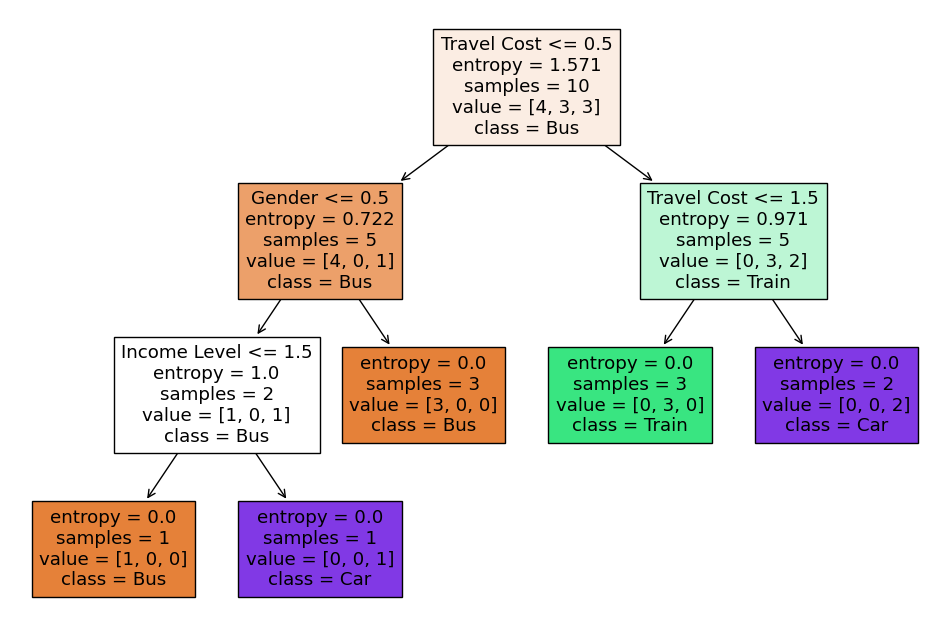

|--- Travel Cost <= 0.50
|   |--- Gender <= 0.50
|   |   |--- Income Level <= 1.50
|   |   |   |--- class: 0
|   |   |--- Income Level >  1.50
|   |   |   |--- class: 2
|   |--- Gender >  0.50
|   |   |--- class: 0
|--- Travel Cost >  0.50
|   |--- Travel Cost <= 1.50
|   |   |--- class: 1
|   |--- Travel Cost >  1.50
|   |   |--- class: 2



In [1]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt


data = {
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female'],
    'Car Ownership': [0, 1, 1, 0, 1, 0, 1, 1, 2, 2],
    'Travel Cost': ['Cheap', 'Cheap', 'Cheap', 'Cheap', 'Cheap', 'Standard', 'Standard', 'Expensive', 'Expensive', 'Expensive'],
    'Income Level': ['Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'High'],
    'Transportation': ['Bus', 'Bus', 'Train', 'Bus', 'Bus', 'Train', 'Train', 'Car', 'Car', 'Car']
}

df = pd.DataFrame(data)


le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

X = df.drop('Transportation', axis=1)  # Fitur
y = df['Transportation']  # Label


model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X, y)


plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=le.inverse_transform(df['Transportation'].unique()), filled=True)
plt.show()


rules = export_text(model, feature_names=list(X.columns))
print(rules)
